In [1]:
from keras.models import load_model
from keras.utils import plot_model
import h5py
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load test data
with h5py.File('data.hdf5', 'r') as f:
    X_test = f['X_test'][()]
    Y_test = f['Y_test'][()]

# Add the extra channel axis
X_test = X_test[:,np.newaxis,:,:]
Y_test = Y_test[:, np.newaxis, :, :]

# Baseline model

In [3]:
# Import the model
baseline_model = load_model("models/model_benchmark.hdf5")
plot_model(baseline_model, show_shapes=True, to_file='models/baseline_model.png')

Overall MSE:  0.021373428


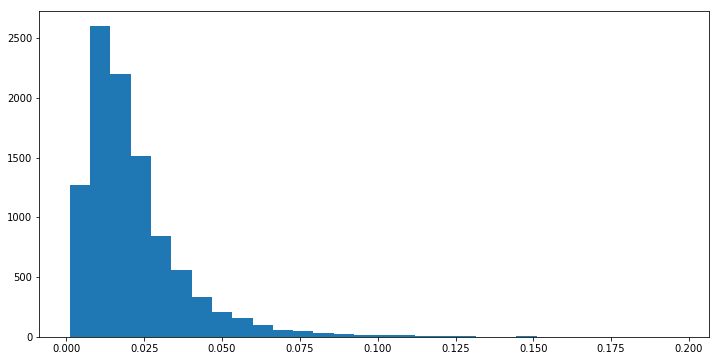

In [4]:
# Calculate predictions
baseline_prediction = baseline_model.predict(x=X_test)

# MSE calculated for each image
baseline_mse = ((Y_test-baseline_prediction)**2).mean(axis=(1,2,3))
print("Overall MSE: ", baseline_mse.mean())

# Plot the MSE distribution as a histogram
plt.figure(figsize=(12,6))
plt.hist(baseline_mse, bins=30)
plt.show()

## Plot the outputs with the 20 worst MSE results

Index:  3520
MSE:  0.11519101


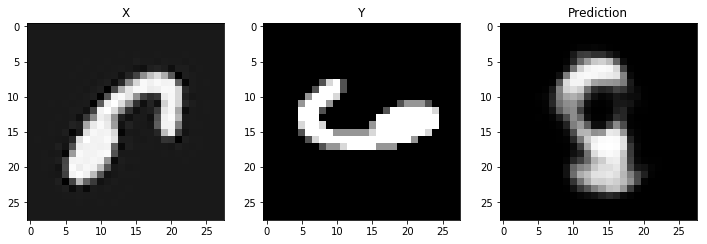

Index:  2040
MSE:  0.117099196


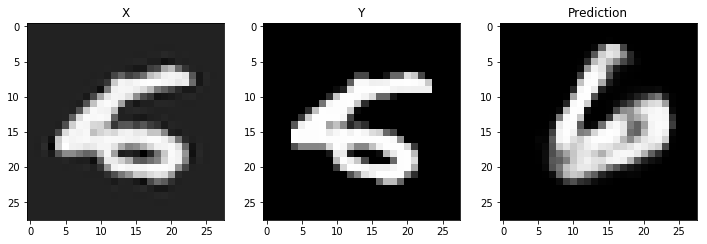

Index:  7691
MSE:  0.11737185


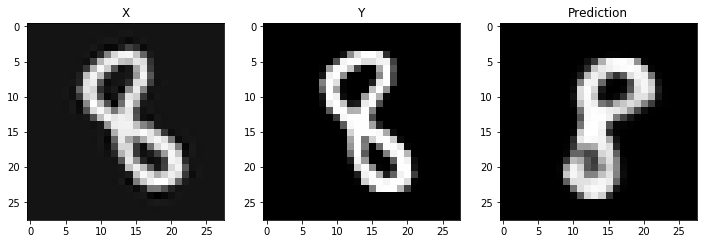

Index:  3251
MSE:  0.11837835


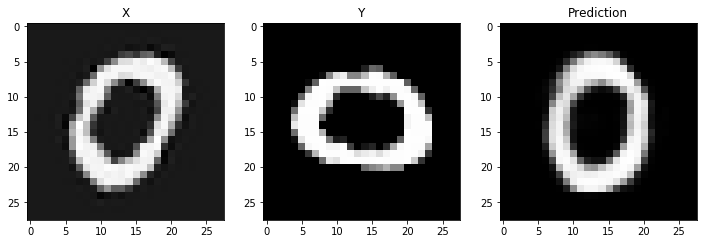

Index:  4615
MSE:  0.11908932


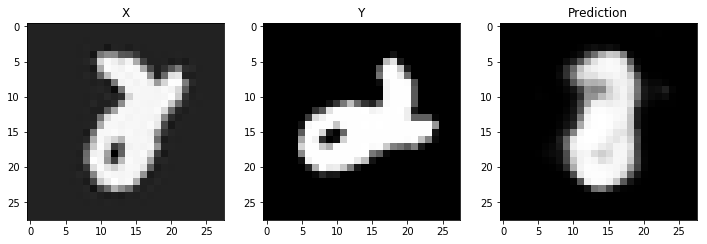

Index:  619
MSE:  0.1193146


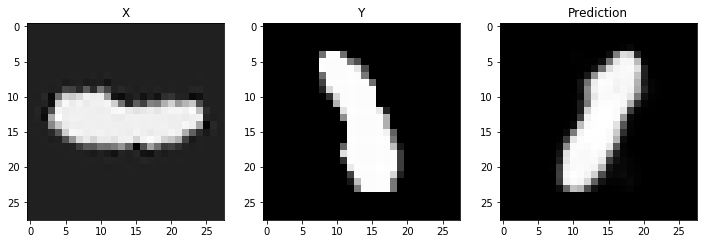

Index:  3836
MSE:  0.12178166


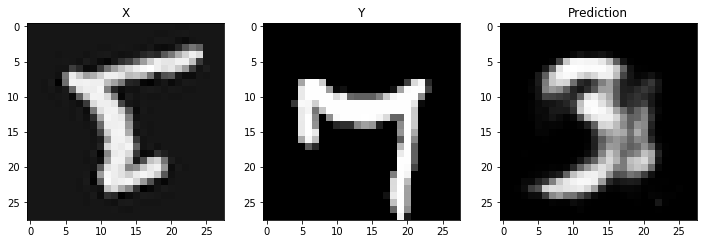

Index:  3031
MSE:  0.12328965


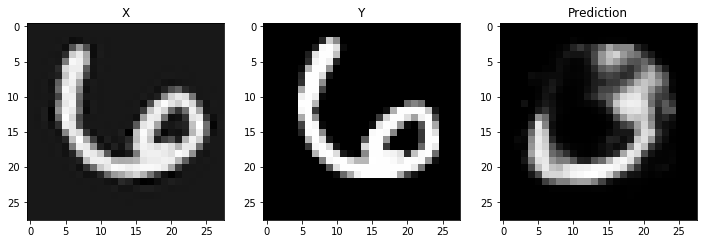

Index:  9494
MSE:  0.12652092


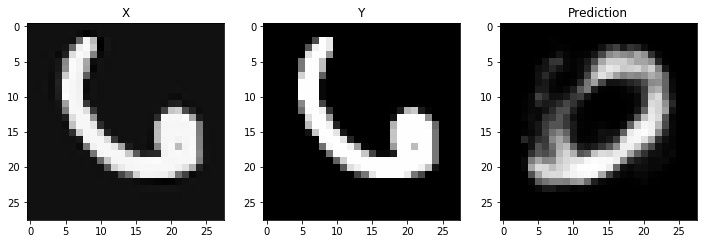

Index:  1940
MSE:  0.12907179


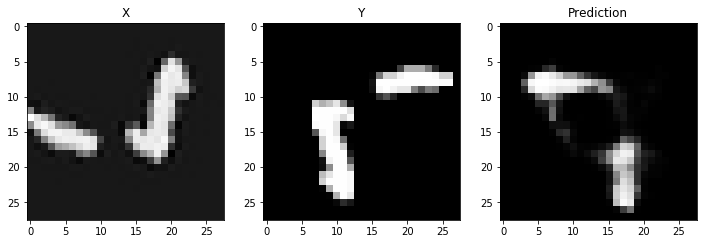

Index:  8273
MSE:  0.13095199


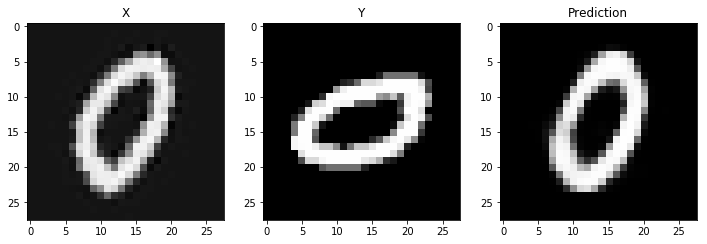

Index:  1337
MSE:  0.13754874


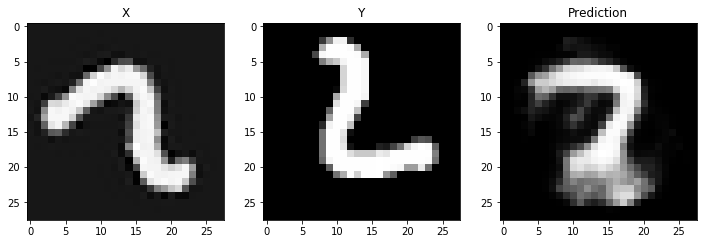

Index:  1191
MSE:  0.14067721


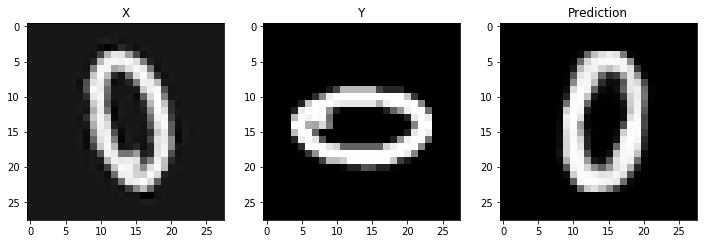

Index:  3818
MSE:  0.14114685


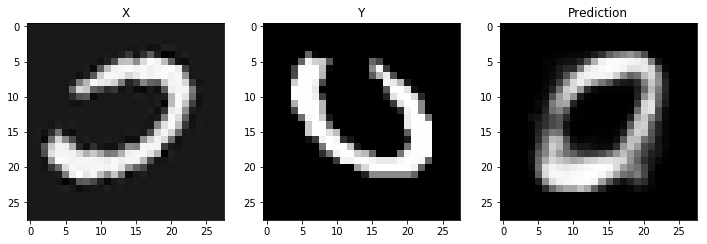

Index:  691
MSE:  0.14465092


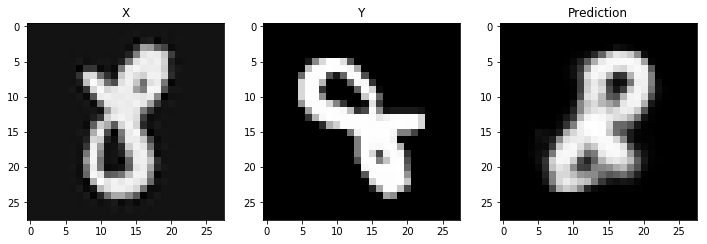

Index:  1263
MSE:  0.14604338


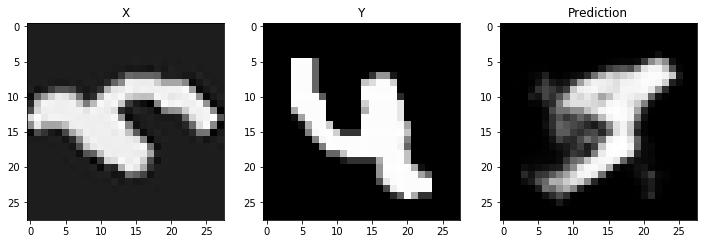

Index:  360
MSE:  0.14625184


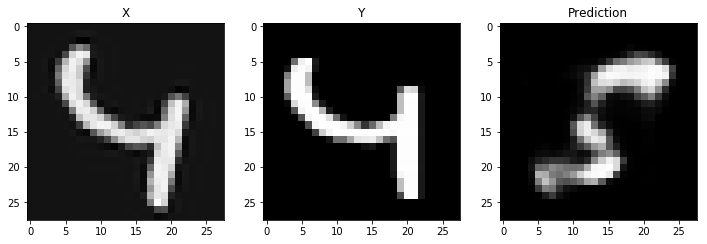

Index:  461
MSE:  0.17250995


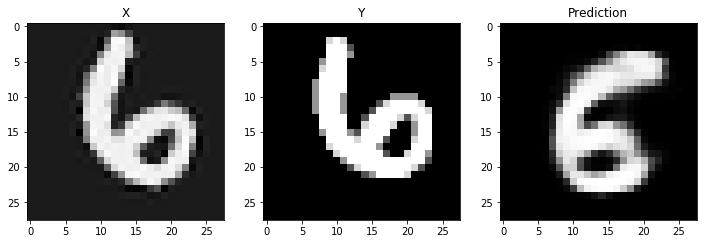

Index:  287
MSE:  0.17911665


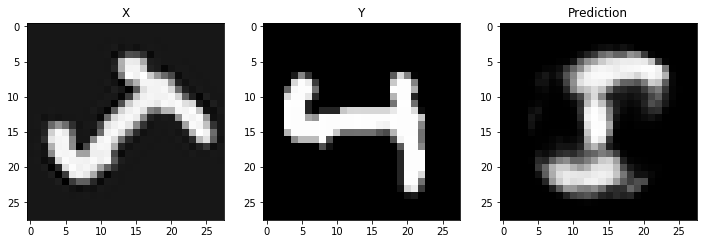

Index:  2145
MSE:  0.19666566


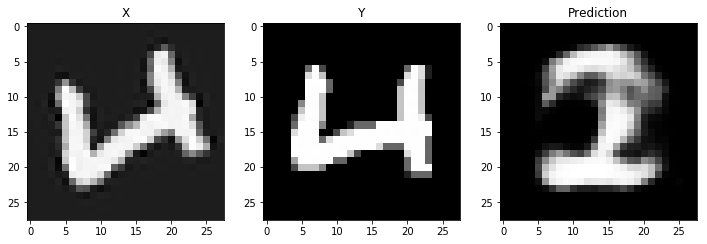

In [5]:
# Check out the instance with the highest error
indicies = np.argsort(baseline_mse)[-20:]
for idx in indicies:
    print("Index: ", idx)
    print("MSE: ", baseline_mse[idx])
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

    axes[0].imshow(X_test[idx,0,:,:], cmap='Greys_r')
    axes[0].set_title("X")

    axes[1].imshow(Y_test[idx,0,:,:], cmap='Greys_r')
    axes[1].set_title("Y")

    axes[2].imshow(baseline_prediction[idx,0,:,:], cmap='Greys_r')
    axes[2].set_title("Prediction")
    plt.show()

# Transposed convolution model

In [6]:
# Import the model
convt_model = load_model("models/model_convt.hdf5")
plot_model(convt_model, show_shapes=True, to_file='models/convt_model.png')

Overall MSE:  0.04071745


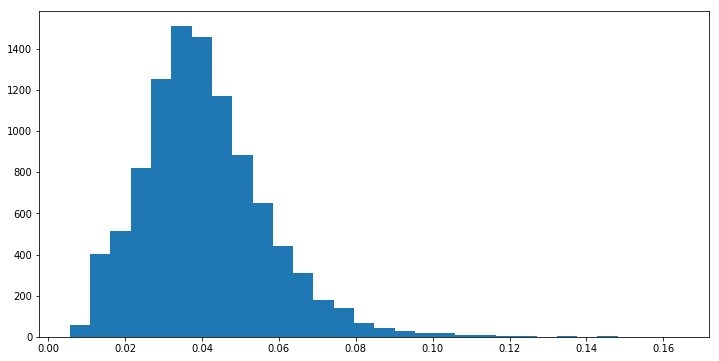

In [7]:
# Calculate predictions
convt_prediction = convt_model.predict(x=X_test)

# MSE calculated for each image
convt_mse = ((Y_test-convt_prediction)**2).mean(axis=(1,2,3))
print("Overall MSE: ", convt_mse.mean())

# Plot the MSE distribution as a histogram
plt.figure(figsize=(12,6))
plt.hist(convt_mse, bins=30)
plt.show()

## Plot the outputs with the 20 worst MSE results

Index:  3394
MSE:  0.06289005


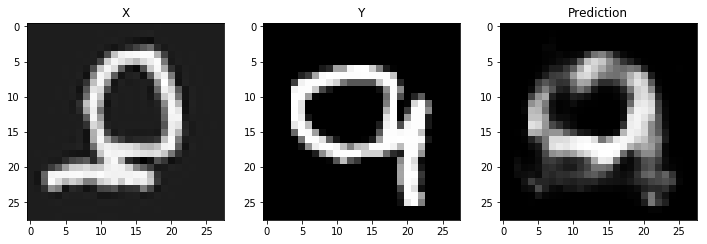

Index:  4768
MSE:  0.016501147


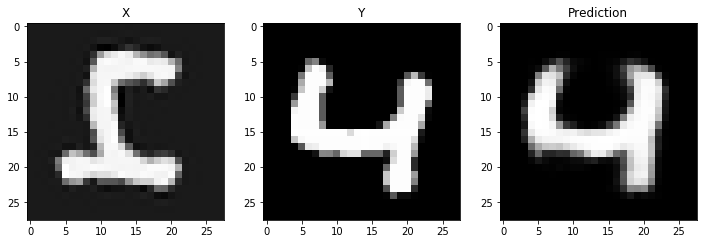

Index:  1391
MSE:  0.028175661


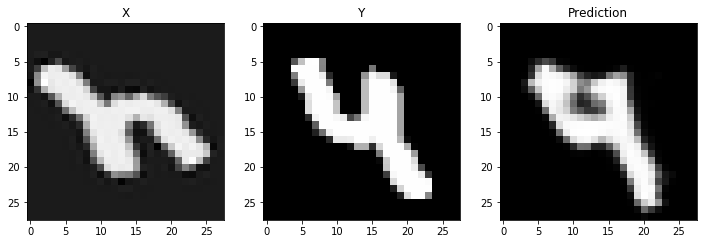

Index:  3181
MSE:  0.027138194


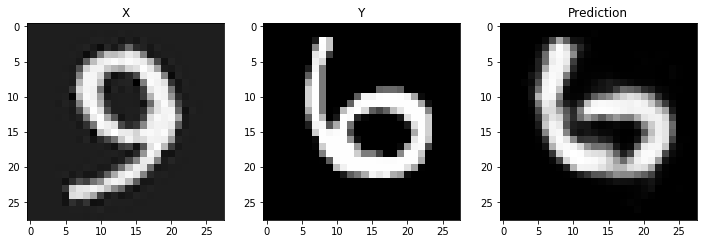

Index:  4086
MSE:  0.09007091


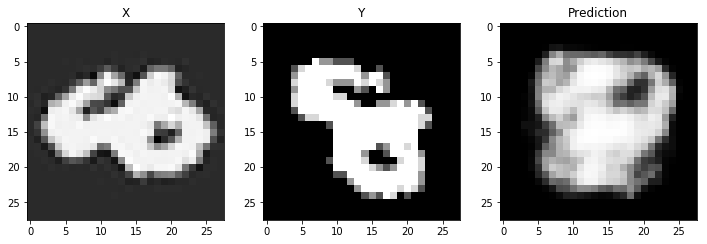

Index:  1101
MSE:  0.03788745


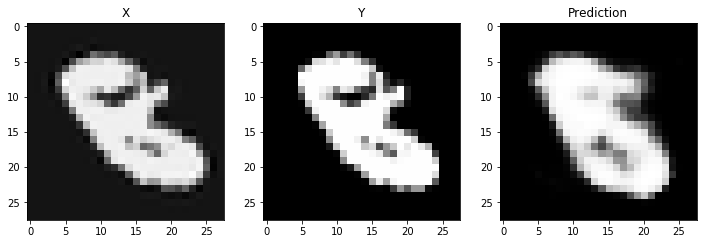

Index:  2170
MSE:  0.028547652


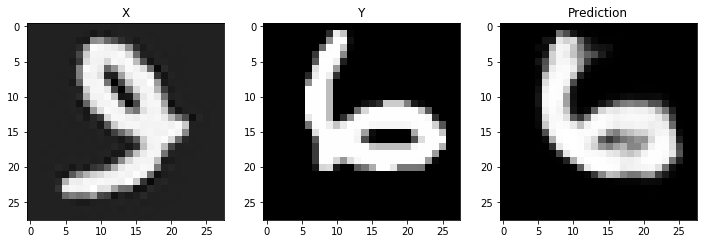

Index:  3836
MSE:  0.12178166


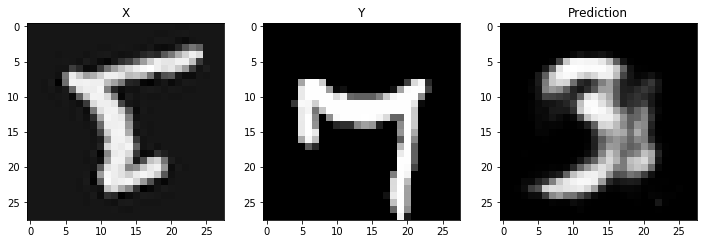

Index:  1801
MSE:  0.04251661


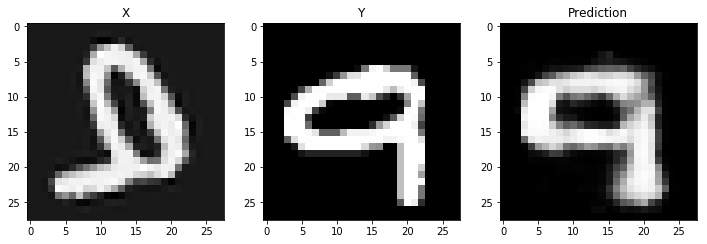

Index:  2378
MSE:  0.104407236


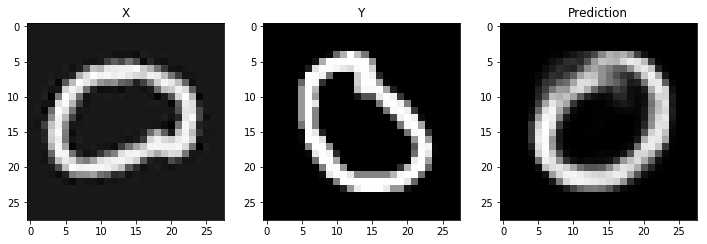

Index:  2436
MSE:  0.039560124


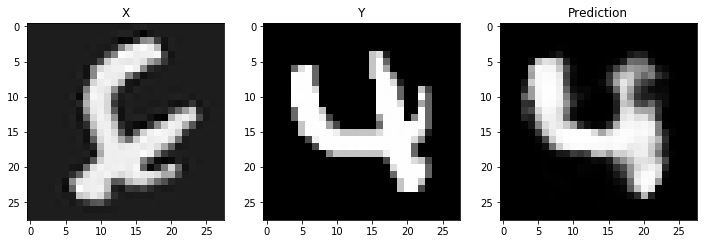

Index:  2826
MSE:  0.045389015


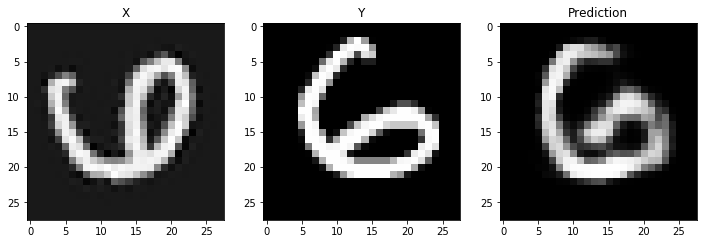

Index:  2882
MSE:  0.022533385


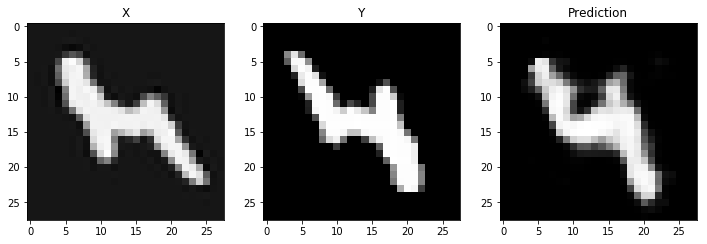

Index:  1671
MSE:  0.07459479


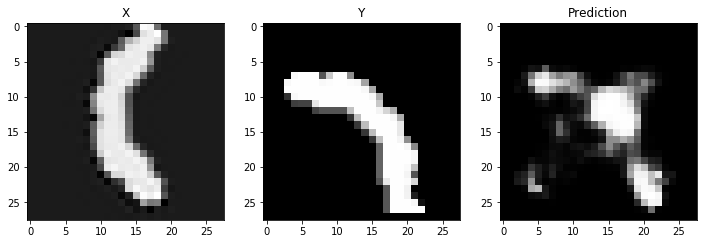

Index:  475
MSE:  0.014066872


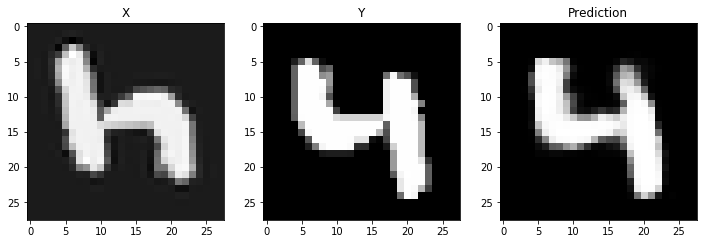

Index:  3542
MSE:  0.1116231


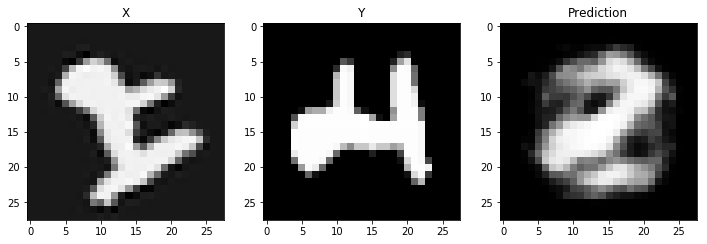

Index:  1263
MSE:  0.14604338


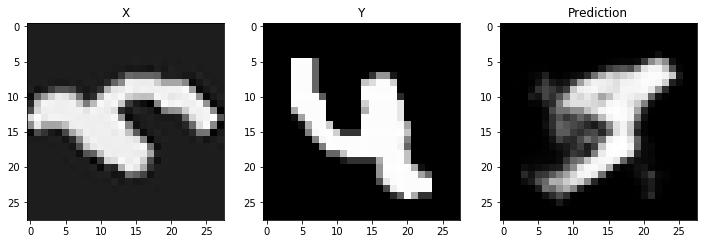

Index:  287
MSE:  0.17911665


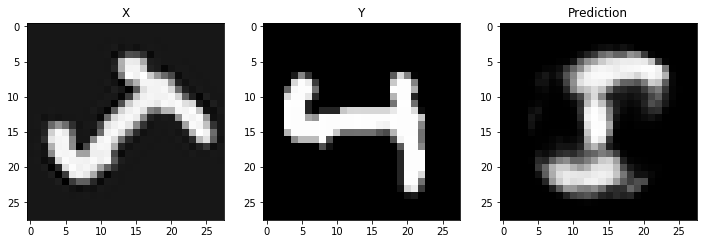

Index:  3517
MSE:  0.023795668


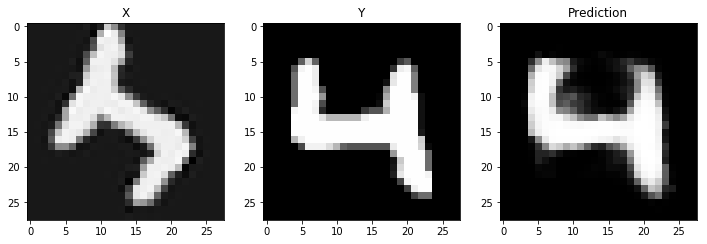

Index:  3841
MSE:  0.0705665


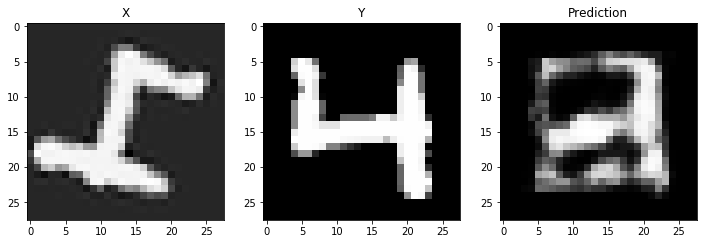

In [8]:
# Check out the instance with the highest error
indicies = np.argsort(convt_mse)[-20:]
for idx in indicies:
    print("Index: ", idx)
    print("MSE: ", baseline_mse[idx])
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

    axes[0].imshow(X_test[idx,0,:,:], cmap='Greys_r')
    axes[0].set_title("X")

    axes[1].imshow(Y_test[idx,0,:,:], cmap='Greys_r')
    axes[1].set_title("Y")

    axes[2].imshow(baseline_prediction[idx,0,:,:], cmap='Greys_r')
    axes[2].set_title("Prediction")
    plt.show()

# Upsample model

In [9]:
# Import the model
ups_model = load_model("models/model_upsample.hdf5")
plot_model(ups_model, show_shapes=True, to_file='models/ups_model.png')

Overall MSE:  0.029701449


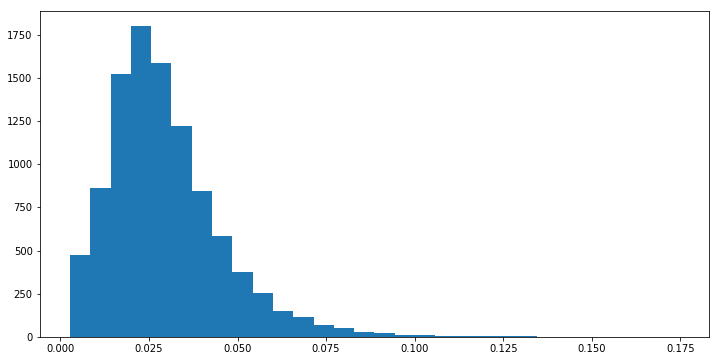

In [10]:
# Calculate predictions
ups_prediction = ups_model.predict(x=X_test)

# MSE calculated for each image
ups_mse = ((Y_test-ups_prediction)**2).mean(axis=(1,2,3))
print("Overall MSE: ", ups_mse.mean())

# Plot the MSE distribution as a histogram
plt.figure(figsize=(12,6))
plt.hist(ups_mse, bins=30)
plt.show()

## Plot the outputs with the 20 worst MSE results

Index:  2145
MSE:  0.19666566


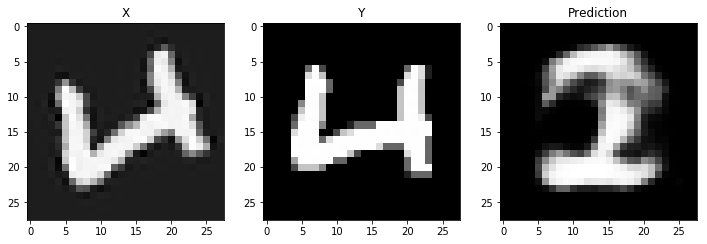

Index:  9504
MSE:  0.042318944


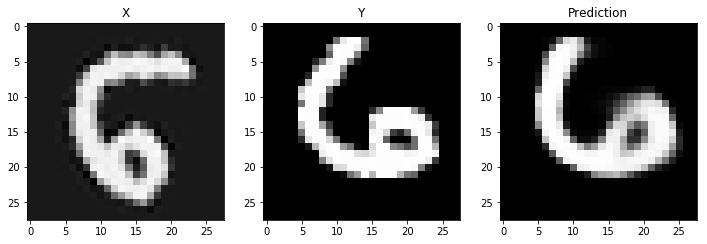

Index:  46
MSE:  0.10861375


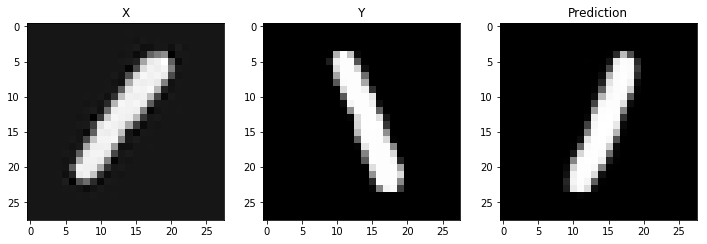

Index:  5887
MSE:  0.049378064


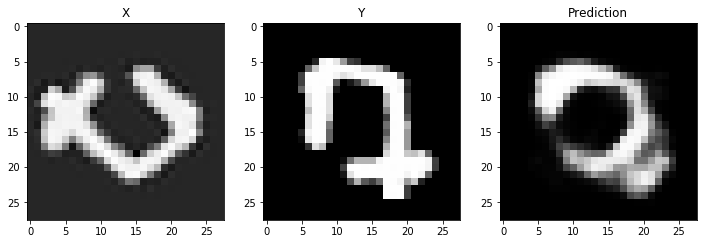

Index:  1337
MSE:  0.13754874


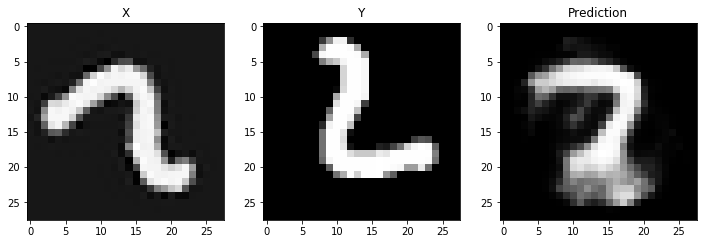

Index:  2882
MSE:  0.022533385


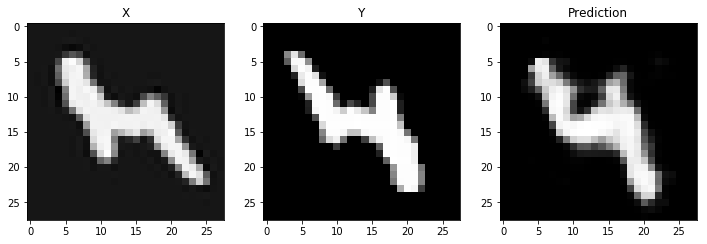

Index:  3836
MSE:  0.12178166


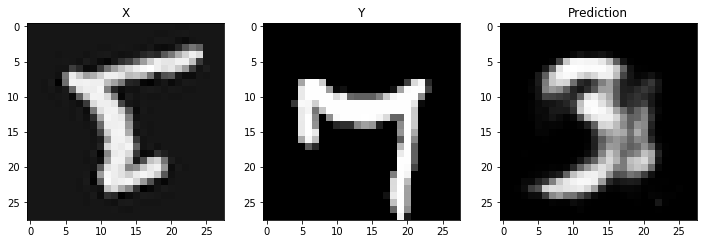

Index:  461
MSE:  0.17250995


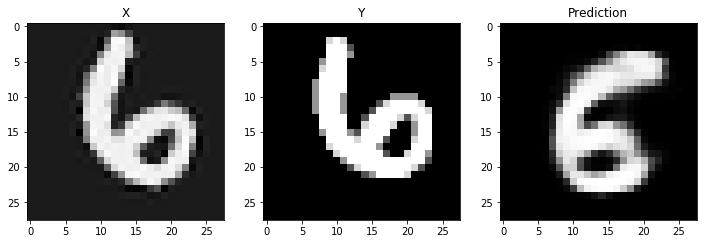

Index:  1790
MSE:  0.10802703


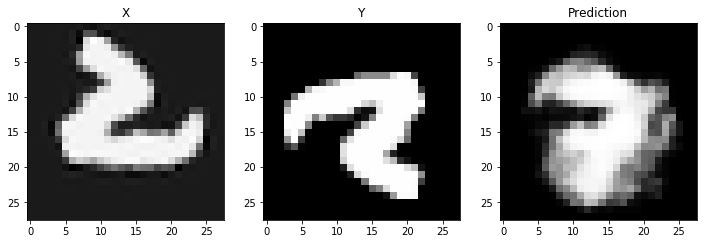

Index:  1017
MSE:  0.06516673


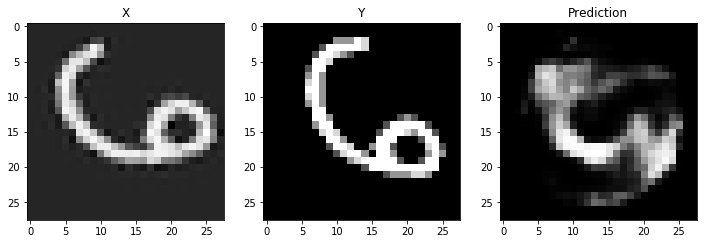

Index:  3818
MSE:  0.14114685


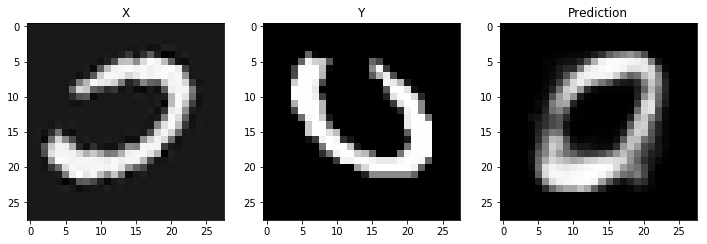

Index:  9494
MSE:  0.12652092


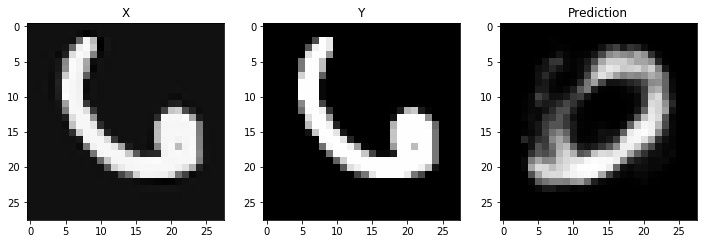

Index:  4743
MSE:  0.04410507


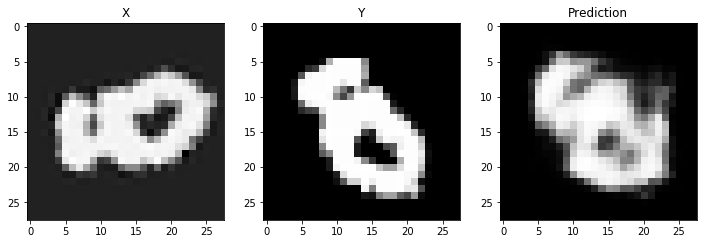

Index:  1101
MSE:  0.03788745


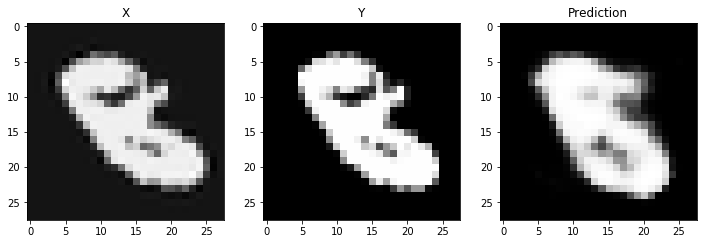

Index:  2378
MSE:  0.104407236


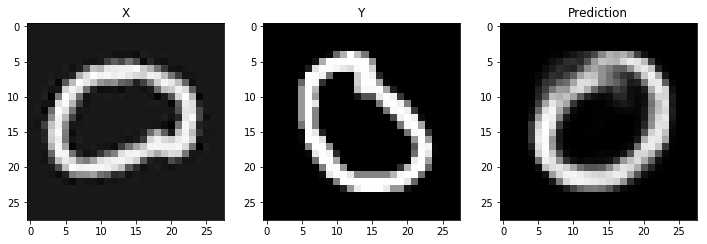

Index:  1391
MSE:  0.028175661


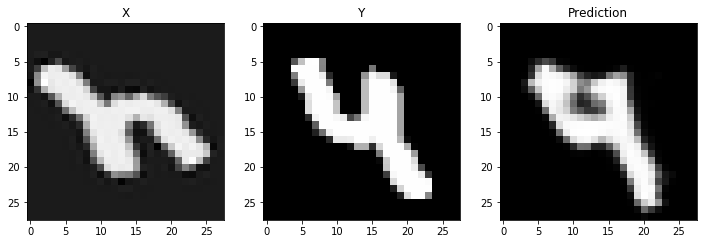

Index:  3347
MSE:  0.07079999


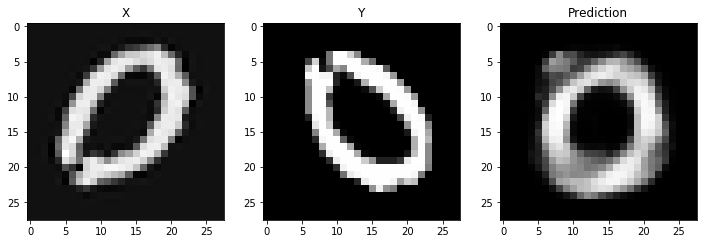

Index:  475
MSE:  0.014066872


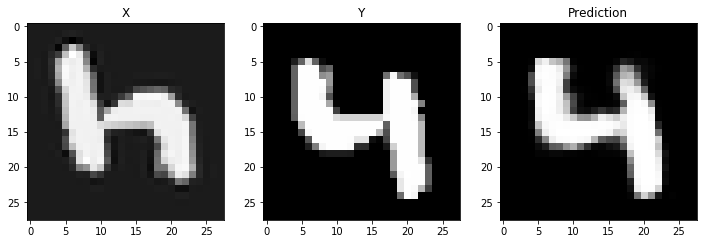

Index:  1263
MSE:  0.14604338


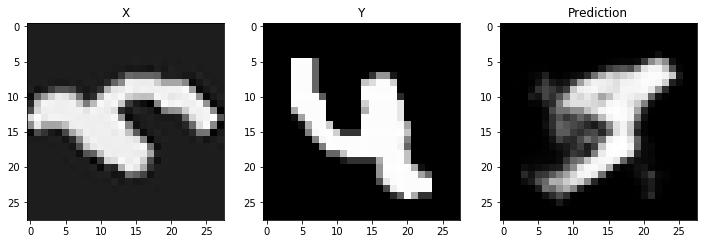

Index:  287
MSE:  0.17911665


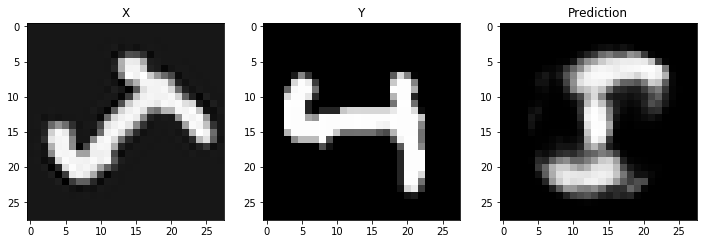

In [11]:
# Check out the instance with the highest error
indicies = np.argsort(ups_mse)[-20:]
for idx in indicies:
    print("Index: ", idx)
    print("MSE: ", baseline_mse[idx])
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

    axes[0].imshow(X_test[idx,0,:,:], cmap='Greys_r')
    axes[0].set_title("X")

    axes[1].imshow(Y_test[idx,0,:,:], cmap='Greys_r')
    axes[1].set_title("Y")

    axes[2].imshow(baseline_prediction[idx,0,:,:], cmap='Greys_r')
    axes[2].set_title("Prediction")
    plt.show()

# Combined model

In [12]:
# Import the model
comb_model = load_model("models/model_comb.hdf5")
plot_model(comb_model, show_shapes=True, to_file='models/combined_model.png')

Overall MSE:  0.01734683


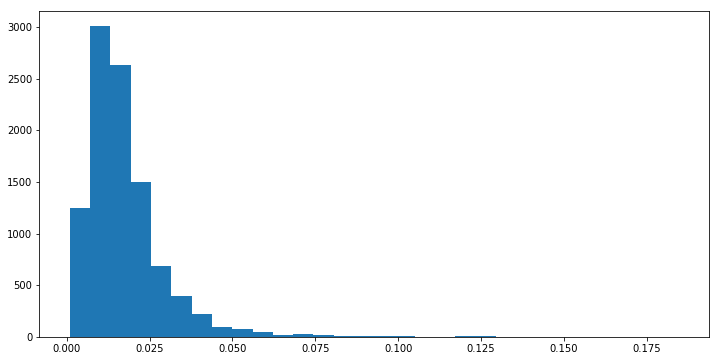

In [13]:
# Calculate predictions
comb_prediction = comb_model.predict(x=X_test)

# MSE calculated for each image
comb_mse = ((Y_test-comb_prediction)**2).mean(axis=(1,2,3))
print("Overall MSE: ", comb_mse.mean())

# Plot the MSE distribution as a histogram
plt.figure(figsize=(12,6))
plt.hist(comb_mse, bins=30)
plt.show()

## Plot the outputs with the 20 worst MSE results

Index:  4834
MSE:  0.067463644


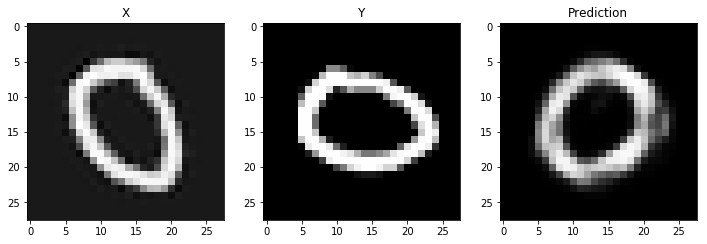

Index:  3347
MSE:  0.07079999


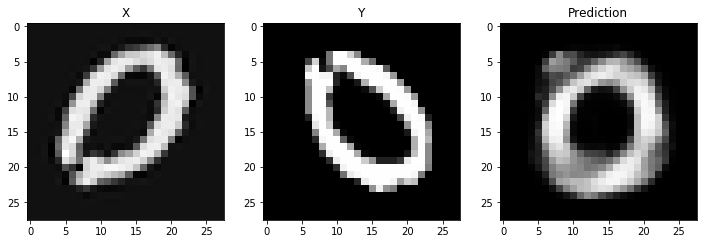

Index:  8513
MSE:  0.06371235


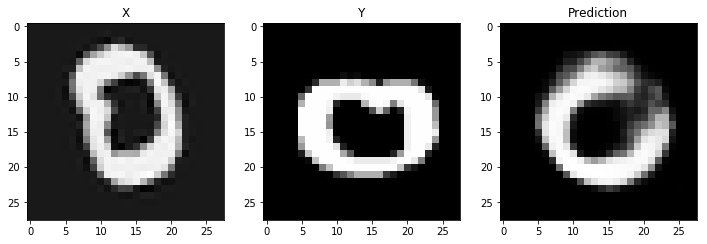

Index:  1101
MSE:  0.03788745


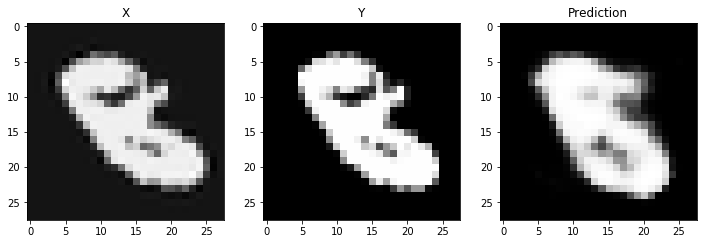

Index:  5613
MSE:  0.092494555


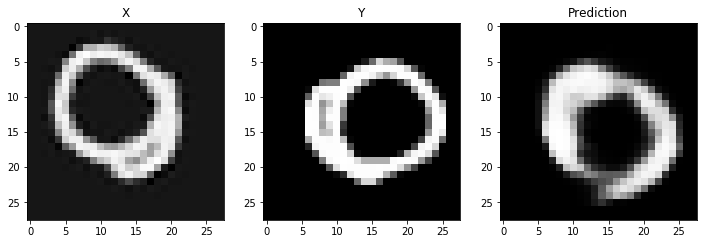

Index:  4403
MSE:  0.098192714


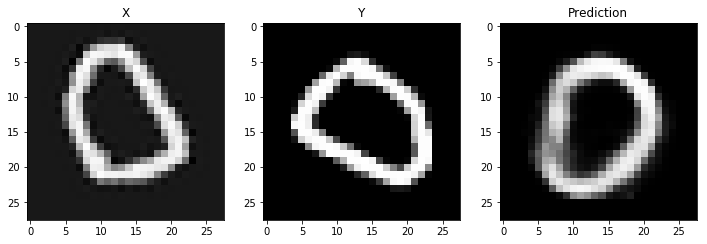

Index:  3542
MSE:  0.1116231


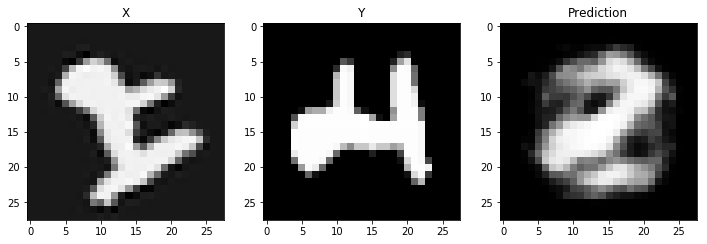

Index:  3520
MSE:  0.11519101


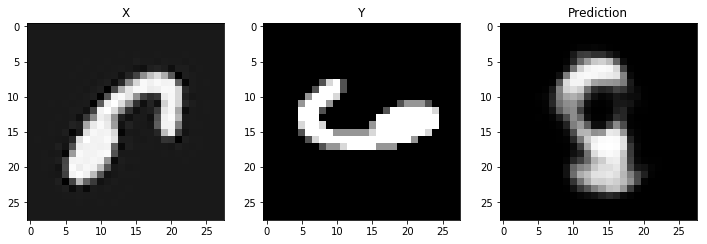

Index:  461
MSE:  0.17250995


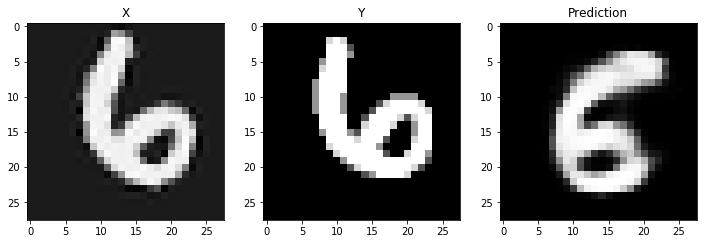

Index:  3251
MSE:  0.11837835


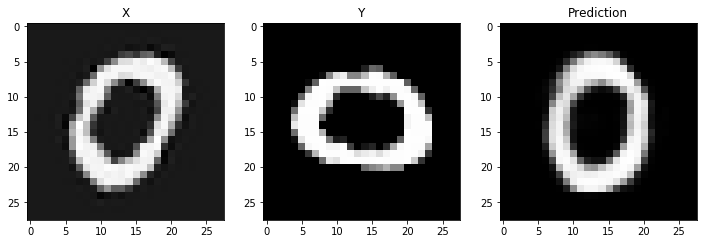

Index:  1191
MSE:  0.14067721


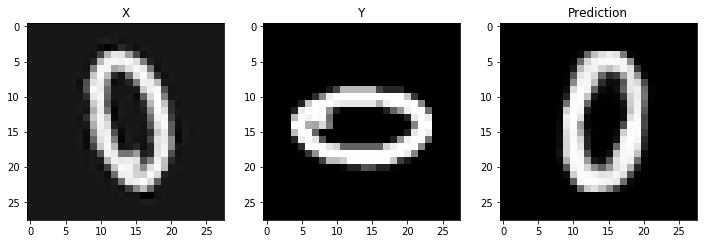

Index:  1940
MSE:  0.12907179


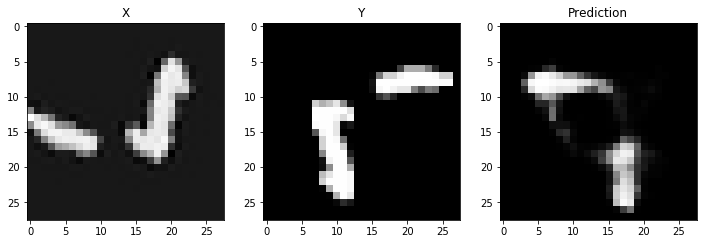

Index:  2378
MSE:  0.104407236


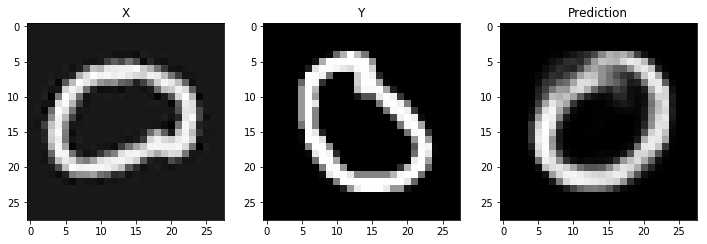

Index:  1337
MSE:  0.13754874


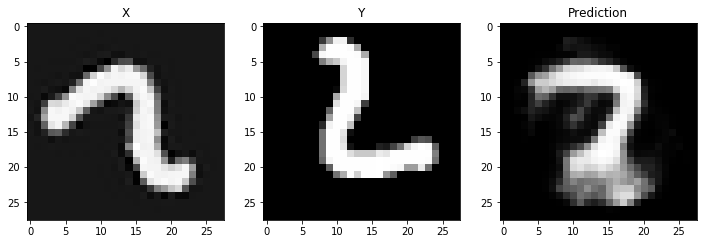

Index:  9494
MSE:  0.12652092


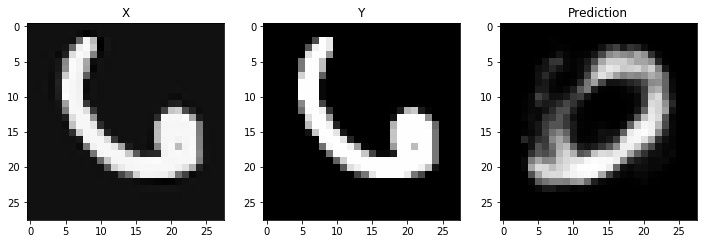

Index:  2291
MSE:  0.1148048


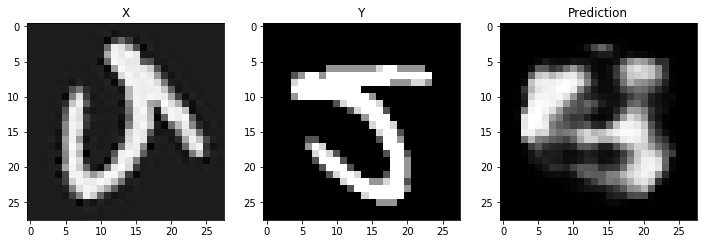

Index:  1263
MSE:  0.14604338


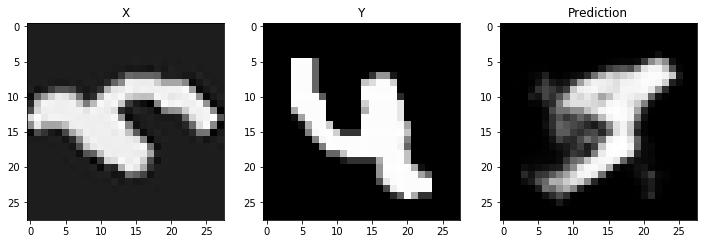

Index:  2145
MSE:  0.19666566


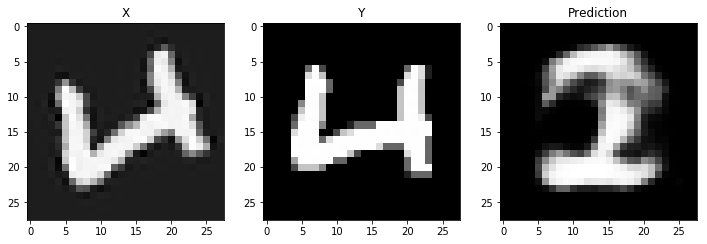

Index:  3818
MSE:  0.14114685


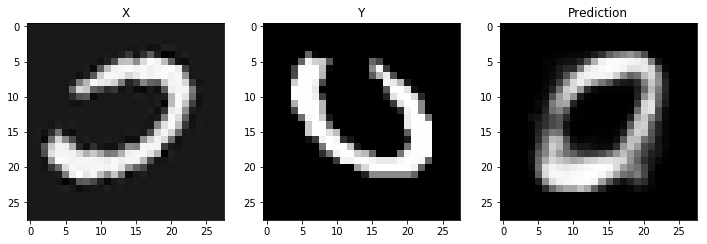

Index:  287
MSE:  0.17911665


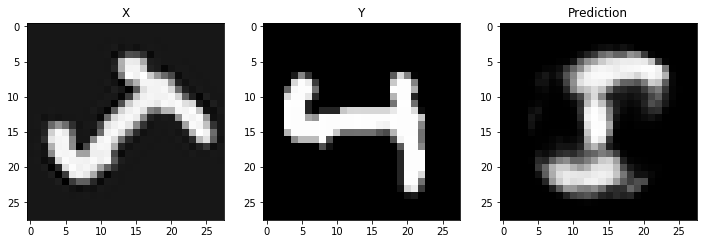

In [14]:
# Check out the instance with the highest error
indicies = np.argsort(comb_mse)[-20:]
for idx in indicies:
    print("Index: ", idx)
    print("MSE: ", baseline_mse[idx])
    plt.clf()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

    axes[0].imshow(X_test[idx,0,:,:], cmap='Greys_r')
    axes[0].set_title("X")

    axes[1].imshow(Y_test[idx,0,:,:], cmap='Greys_r')
    axes[1].set_title("Y")

    axes[2].imshow(baseline_prediction[idx,0,:,:], cmap='Greys_r')
    axes[2].set_title("Prediction")
    plt.show()